In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import datasets
from sklearn import manifold

%matplotlib inline

In [5]:
data = datasets.fetch_openml('mnist_784', version=1, return_X_y=True)
pixel_values, targets = data
targets = targets.astype(int)

In [6]:
pixel_values.shape

(70000, 784)

In [7]:
targets.shape

(70000,)

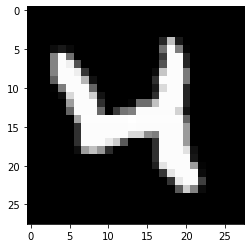

In [26]:
single_image = pixel_values.values[20, :].reshape(28, 28)
plt.imshow(single_image, cmap='gray')

In [12]:
tsne = manifold.TSNE(n_components=2, random_state=42)

In [14]:
transformed_data = tsne.fit_transform(pixel_values.iloc[:3000, :])

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [16]:
tsne_df = pd.DataFrame(
    np.column_stack((transformed_data, targets[:3000])), 
    columns=['x', 'y', 'targets']
)

tsne_df.loc[:, 'targets'] = tsne_df.targets.astype(int)

In [19]:
tsne_df.head()

,x,y,targets
0,31.722771,-16.391663,5
1,10.612940,-67.804901,0
2,49.593014,38.388294,4
3,-37.814510,32.660255,1
4,22.104887,31.574816,9


In [20]:
tsne_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   x        3000 non-null   float64
 1   y        3000 non-null   float64
 2   targets  3000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 70.4 KB


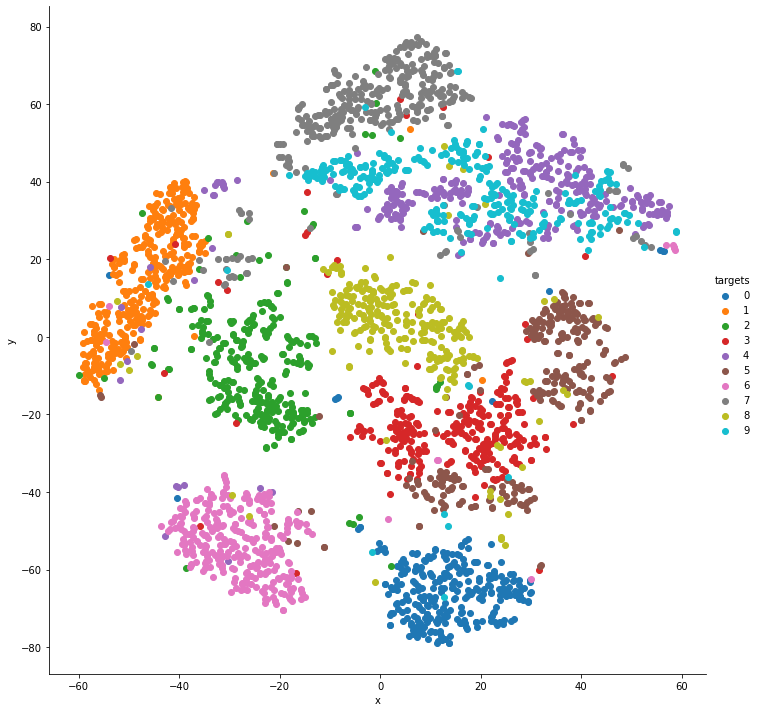

In [25]:
grid = sns.FacetGrid(tsne_df, hue="targets", height=10)
grid.map(plt.scatter, "x", "y").add_legend()
plt.show()